In [145]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from scipy import integrate
from astropy.coordinates import SkyCoord


# Imports necessary for Source Catalog
from photutils.background import Background2D, MedianBackground
from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel
from photutils.segmentation import detect_sources
from photutils.segmentation import deblend_sources
from photutils.segmentation import SourceFinder
from photutils.segmentation import SourceCatalog
from scipy import ndimage
from scipy.ndimage import binary_erosion
from numpy import loadtxt
from photutils.aperture import CircularAperture, aperture_photometry, EllipticalAperture
from astropy.coordinates import match_coordinates_sky

# Imports necessary for visulisation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import simple_norm


from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import numpy as np
from mpdaf.obj import Cube, Image

# Imports for cutouts and convolution

from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import numpy as np
from mpdaf.obj import Cube, Image
import os


from mpdaf.obj import Cube
from mpdaf.drs import PixTable
from astropy.io import fits
from astropy.wcs import WCS as AstropyWCS
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube, Spectrum
from scipy.ndimage import gaussian_filter1d

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from mpdaf.obj import Spectrum, Cube
from astropy.coordinates import SkyCoord
from astropy.convolution import convolve, Gaussian1DKernel

import numpy as np
from astropy.convolution import Gaussian1DKernel, convolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [146]:
fname = '/Users/s2537809/comb_Q2225.fits'

data = fits.open(fname)

cube = SpectralCube.read(fname)

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


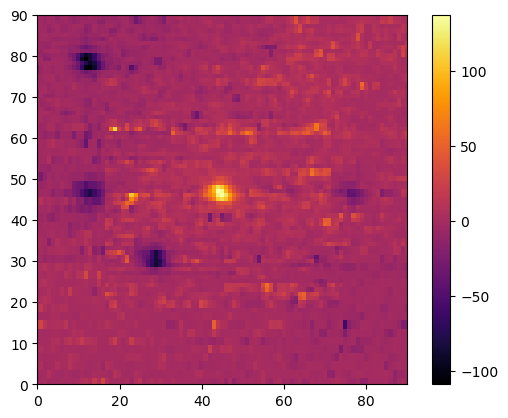

In [149]:
# cube1 2d image
image = cube.mean(axis=0)

# plot
plt.figure()
plt.imshow(image.data, origin='lower', cmap='inferno')
plt.colorbar()
plt.ylim(0, 90)
plt.xlim(0, 90)
plt.show()



In [151]:
print(cube)

# print spaxel scale 

SpectralCube with shape=(2216, 146, 96):
 n_x:     96  type_x: RA---TAN  unit_x: deg    range:   336.308979 deg:  336.312293 deg
 n_y:    146  type_y: DEC--TAN  unit_y: deg    range:     5.451324 deg:    5.456358 deg
 n_s:   2216  type_s: WAVE      unit_s: um     range:        1.929 um:       2.471 um
96 146


In [120]:
cube = fits.getdata(fname)
hdr = fits.getheader(fname)


wl = (np.arange(hdr['NAXIS3'])-hdr['CRPIX3'])*hdr['CDELT3'] + hdr['CRVAL3']
x = np.arange(hdr['NAXIS1'])
y = np.arange(hdr['NAXIS2'])
l = np.arange(hdr['NAXIS3'])


X, Y = np.meshgrid(x, y)


white_img = np.nanmedian(cube[200:-500, :, :], axis=0)

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [121]:
# find the pixel coordinates of the peak flux
y0, x0 = np.unravel_index(np.nanargmax(image), image.shape)

print(f"Centre of source:{x0,y0}")


# find spec 1d's  for array of aperture sizes
def spec1d_aper(r_ext):
    aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
    aper_cube = np.resize(aper, cube.shape)
    spec1d = np.nansum(cube*aper_cube, axis=(1, 2))
    return spec1d

r_exts = np.arange(1, 25, 1)

spec1ds = [spec1d_aper(r_ext) for r_ext in r_exts]
print (spec1ds)

Centre of source:(44, 47)
[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., 

Best radius: 3, with snr: 18.429128646850586


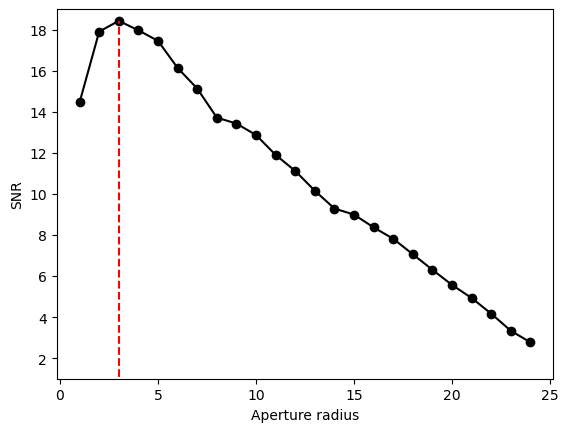

In [138]:
# Define mask for extraction of spectrum:
imin, imax = 2.33, 2.35
mask = (wl > imin) & (wl < imax)


# find snr for array of spec 1ds
def snr(spec1d):
    mean_flux = np.nanmean(spec1d[mask])
    std_flux = np.nanstd(spec1d[mask])
    return mean_flux / std_flux

snrs = [snr(spec1d) for spec1d in spec1ds]


print(f"Best radius: {r_exts[np.argmax(snrs)]}, with snr: {np.max(snrs)}")

plt.figure()
plt.plot(r_exts, snrs, 'o-', color='black')
plt.xlabel('Aperture radius')
plt.ylabel('SNR')
plt.vlines(r_exts[np.argmax(snrs)], 0, np.max(snrs), color='red', linestyle='--')
plt.ylim(1, 19)
plt.show()

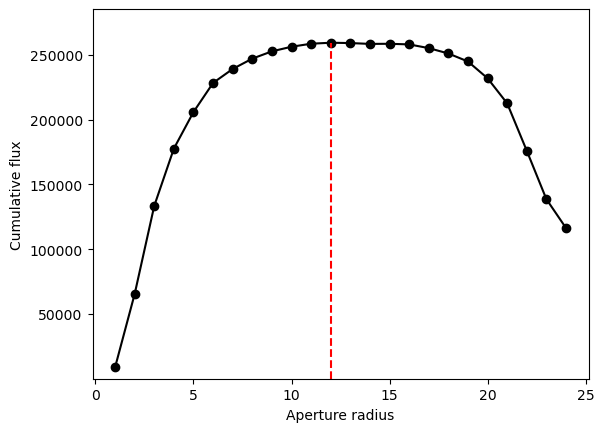

Max radius:12


In [140]:
# find the cummulalative flux for each spectrum in 1d specs
def cum_flux(spec1d):
    return np.nansum(spec1d[mask])

cum_fluxes = [cum_flux(spec1d) for spec1d in spec1ds]

plt.figure()
plt.plot(r_exts, cum_fluxes, 'o-', color='black')
plt.vlines(r_exts[np.argmax(cum_fluxes)], 0, np.max(cum_fluxes), color='red', linestyle='--')
plt.xlabel('Aperture radius')
plt.ylabel('Cumulative flux')
plt.ylim(3, 1.1*np.max(cum_fluxes))
plt.show()


# print aperture of peak flux
print(f"Max radius:{r_exts[np.argmax(cum_fluxes)]}")

In [124]:
# create spectrum for aperture of 3
aper = (X-x0)**2 + (Y-y0)**2 < 3**2
aper_cube = np.resize(aper, cube.shape)
spec1d = np.nansum(cube*aper_cube, axis=(1, 2)) / np.sum(aper)


snr: 18.933773040771484


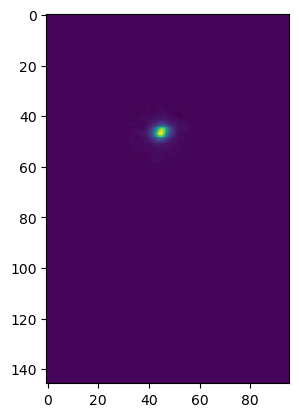

In [125]:
# PSF
# psf aper:
r_psf = 12 # weirdly seems to not change massively with radius
aper_psf = (X-x0)**2 + (Y-y0)**2 < r_psf**2
aper_psf_cube = np.resize(aper_psf, cube.shape)

# Construct PSF image:
aper_psf_cube = aper_psf_cube.T * mask
aper_psf_cube = aper_psf_cube.T
psf = np.nansum((cube*aper_psf_cube), axis=0)
#psf = np.nansum((cube), axis=0)
psf = psf / np.nansum(psf*aper)

# plot the psf
plt.imshow(psf)

# find the total flux in the psf
total_flux = np.nansum(psf)

# normalise to the max flux
psf = psf / total_flux

# plot the normalised psf
plt.imshow(psf)

# weight spectrum extraction by psf 
spec1d = np.nansum((cube*psf), axis=(1, 2))/ np.nansum(psf**2)

mean_flux = np.nanmean(spec1d[mask])
std_flux = np.nanstd(spec1d[mask])
snr = mean_flux / std_flux

print(f"snr: {snr}")

#### SPEC1D IS THE WEIGTED SPECTRUM FROM HERE ONWARDS ####

In [126]:
# open the atmospheric transmission
atm = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p05.txt', format='ascii')
atm_0p05 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p05.txt', format='ascii')
atm_0p25 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p25.txt', format='ascii')
atm_0p50 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p50.txt', format='ascii')
atm_1p0 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_1p0.txt', format='ascii')
atm_1p5 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_1p5.txt', format='ascii')
atm_2p5 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_2p5.txt', format='ascii')
atm_3p5 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_3p5.txt', format='ascii')
atm_20p0 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_20p0.txt', format='ascii')


Optimized kernel size: 5.0


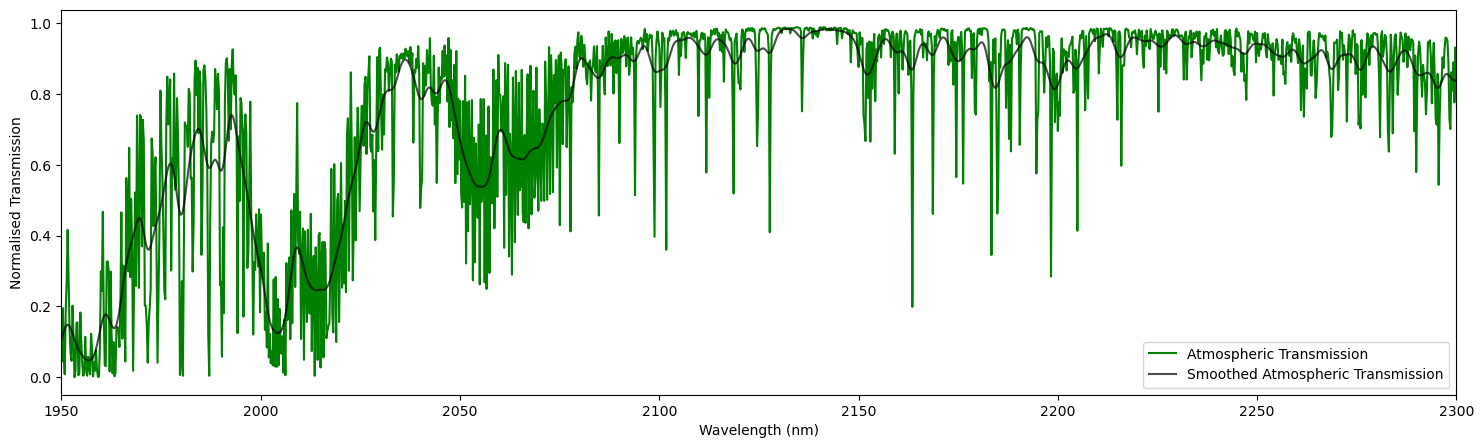

In [144]:


# plot the atmospheric transmission
plt.figure(figsize=(18, 5))
plt.plot(atm['wl'], atm['T_abs'], label='Atmospheric Transmission', color='green')

# Define the chi-squared objective function for minimization
def chi2(params):
    # Round kernel width to ensure kernel size is odd
    kernel_size = np.ceil(params[0])
    
    # Create the kernel with the nearest odd size
    if kernel_size % 2 == 0:
        kernel_size += 1  # Ensure it's odd
        
    kernel = Gaussian1DKernel(kernel_size)
    
    # Apply the smoothing kernel
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    
    # Return the chi-squared (sum of squared differences)
    return np.sum((atm['T_abs'] - atm['T_abs_smooth'])**2)

# Minimize the chi-squared function
initial_guess = [4]  # Start with an initial guess for the kernel width
res = minimize(chi2, initial_guess)

# Use the optimized kernel width for smoothing
best_kernel_size = np.ceil(res.x[0])
if best_kernel_size % 2 == 0:
    best_kernel_size += 1  # Ensure it's odd

# print the best kernel size
print(f"Optimized kernel size: {best_kernel_size}")


kernel = Gaussian1DKernel(best_kernel_size)
atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)



# Plot the results
plt.plot(atm['wl'], atm['T_abs_smooth'], label='Smoothed Atmospheric Transmission', color='black', alpha=0.7)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalised Transmission')
plt.xlim(1950,2300)
plt.legend()
plt.show()


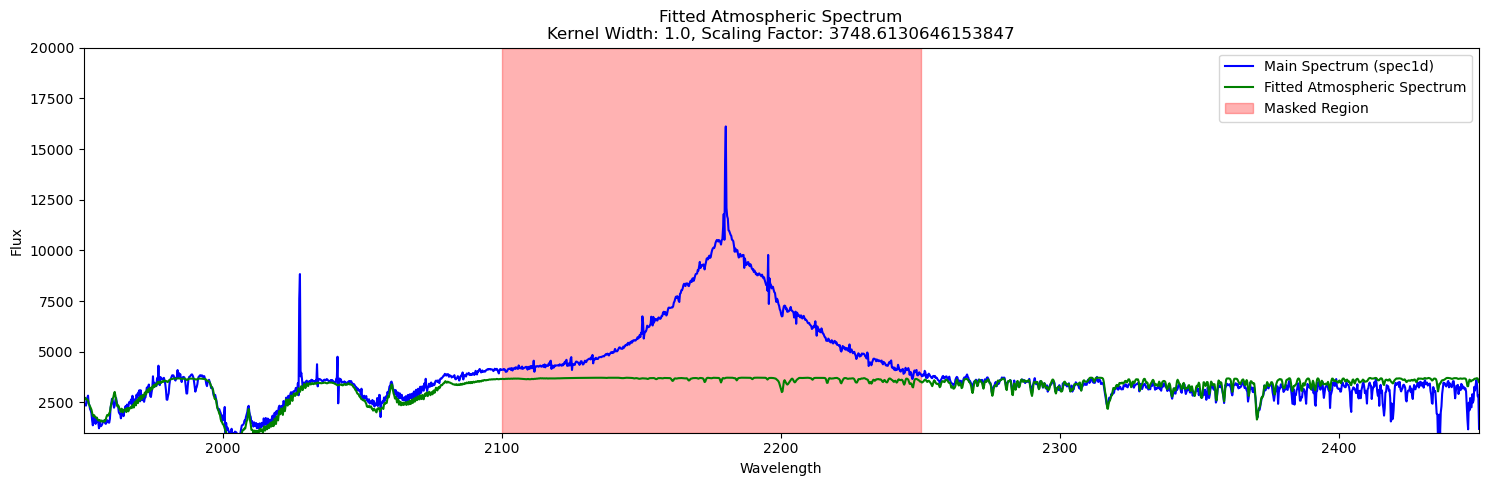

Optimized Kernel Width: 1.0
Optimized Scaling Factor: 3748.6130646153847


In [128]:

# Define the chi-squared objective function for minimization
def chi2(params):
   
    # Round kernel width to ensure kernel size is odd
    kernel_size = np.ceil(params[0])
    #if kernel_size % 2 == 0:
        #kernel_size += 1  # Ensure it's odd
        
    
    kernel = Gaussian1DKernel(kernel_size)
    
    # Apply the smoothing kernel to the atmospheric transmission
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    
    # Apply the scaling factor
    atm['T_abs_scaled'] = atm['T_abs_smooth'] * params[1]
    
    # Create a mask to exclude the wavelengths between 2100 and 2200
    mask = (atm['wl'] < 2100) | (atm['wl'] > 2250)
    
    # Calculate chi-squared using only the unmasked data
    residual = np.sum((spec1d[mask] - atm['T_abs_scaled'][mask])**2)
    
    return residual

# Initial guess for the parameters [kernel width, scaling factor]
initial_guess = [0.9, 3800.0]

# Minimize the chi-squared function to fit both the kernel width and scaling factor
res = minimize(chi2, initial_guess)

# Extract the optimized kernel width and scaling factor
best_kernel_size = np.ceil(res.x[0])

best_scaling_factor = res.x[1]

# Apply the optimized kernel and scaling factor to the atmospheric spectrum
kernel = Gaussian1DKernel(best_kernel_size)
atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
atm['T_abs_scaled'] = atm['T_abs_smooth'] * best_scaling_factor


# Plot the final result
plt.figure(figsize=(18, 5))
plt.plot(atm['wl'], spec1d, label='Main Spectrum (spec1d)', color='blue')
plt.plot(atm['wl'], atm['T_abs_scaled'], label='Fitted Atmospheric Spectrum', color='green')
plt.axvspan(2100, 2250, color='red', alpha=0.3, label='Masked Region')  # Highlight the masked region
plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(1000, 20000)
plt.xlim(1950, 2450)
plt.title(f'Fitted Atmospheric Spectrum\nKernel Width: {best_kernel_size}, Scaling Factor: {best_scaling_factor}')
plt.show()

# Print the best-fitting parameters
print(f"Optimized Kernel Width: {best_kernel_size}")
print(f"Optimized Scaling Factor: {best_scaling_factor}")


In [129]:
atm = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_1p5.txt', format='ascii')


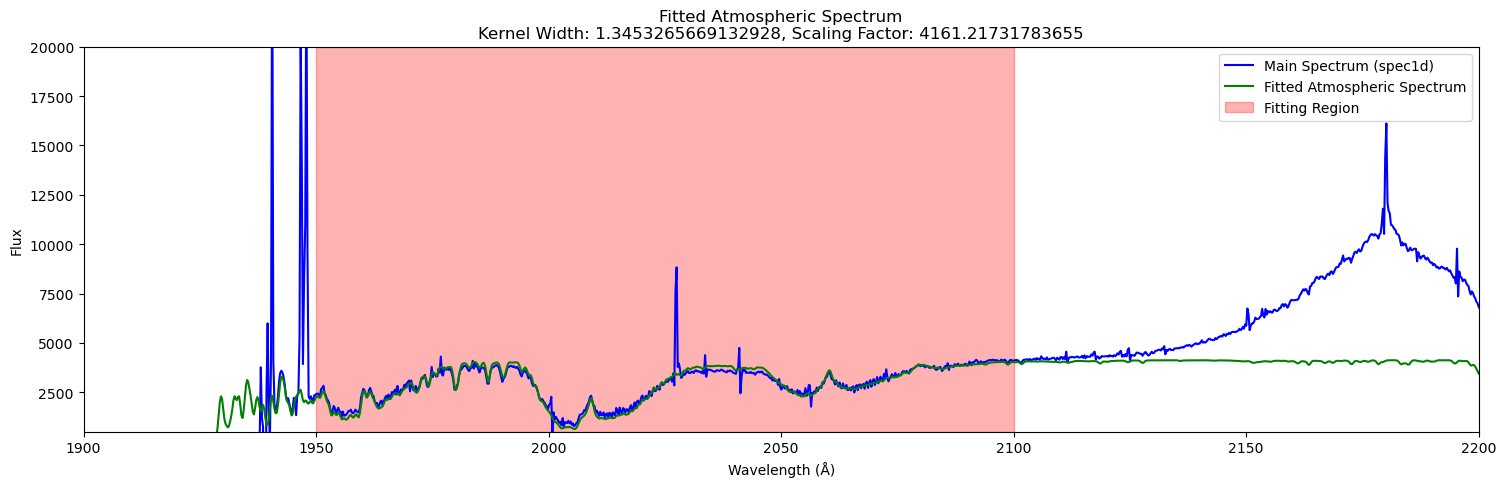

Optimized Sigma (Kernel Width): 1.3453265669132928
Optimized Scaling Factor: 4161.21731783655
Minimum chi-squared = 0.00


In [130]:
# Define the chi-squared objective function for minimization
def chi2(params):
    kernel_size = params[0]
    scaling_factor = params[1]
    
    # Apply Gaussian kernel
    kernel = Gaussian1DKernel(kernel_size)
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    atm['T_abs_scaled'] = atm['T_abs_smooth'] * scaling_factor
    
    # Mask to include only 1950 Å to 2100 Å
    mask = (atm['wl'] > 1950) & (atm['wl'] < 2100)
    
    # Calculate chi-squared
    residual = np.sum((spec1d[mask] - atm['T_abs_scaled'][mask])**2)
    
    return residual

# Initial guess for kernel width and scaling factor
initial_guess = [0.9, 3800.0]

# Perform minimization
res = minimize(chi2, initial_guess)

# Extract optimized parameters
best_kernel_size = res.x[0]
best_scaling_factor = res.x[1]

# Apply best-fit to atmospheric model
kernel = Gaussian1DKernel(best_kernel_size)
atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
atm['T_abs_scaled'] = atm['T_abs_smooth'] * best_scaling_factor

# Plot the results
plt.figure(figsize=(18, 5))
plt.plot(atm['wl'], spec1d, label='Main Spectrum (spec1d)', color='blue')
plt.plot(atm['wl'], atm['T_abs_scaled'], label='Fitted Atmospheric Spectrum', color='green')
plt.axvspan(1950, 2100, color='red', alpha=0.3, label='Fitting Region')  # Highlight the fitted region
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.ylim(500, 20000)
plt.xlim(1900, 2200)
plt.title(f'Fitted Atmospheric Spectrum\nKernel Width: {best_kernel_size}, Scaling Factor: {best_scaling_factor}')
plt.show()

# Print optimized parameters
print(f"Optimized Sigma (Kernel Width): {best_kernel_size}")
print(f"Optimized Scaling Factor: {best_scaling_factor}")

# Calculate the chi-squared value
min_chi2 = np.sum((spec1d[(wl > 1950) & (wl < 2100)] - atm['T_abs_scaled'][(wl > 1950) & (wl < 2100)])**2)
print(f"Minimum chi-squared = {min_chi2:.2f}")


NOTE IF NOT FLAT NEED TO FIT CONTINUUM WITH POLYNOMIAL INSTEAD OF SACLING FACTOR


In [131]:
# Define the chi-squared objective function for minimization
def chi2(params, atm, spec1d):
    # Round kernel width to ensure kernel size is odd
    kernel_size = np.ceil(params[0])
    #if kernel_size % 2 == 0:
        #kernel_size += 1  # Ensure it's odd
        
    kernel = Gaussian1DKernel(kernel_size)
    
    # Apply the smoothing kernel to the atmospheric transmission
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    
    # Apply the scaling factor
    atm['T_abs_scaled'] = atm['T_abs_smooth'] * params[1]
    
    # Define masked region 
    mask = (atm['wl'] < 2100) | (atm['wl'] < 1950)
    
    # Calculate chi-squared (sum of squared residuals, excluding the masked region)
    residual = np.sum((spec1d[mask] - atm['T_abs_scaled'][mask])**2)
    
    return residual


In [132]:
# Function to fit and return the best kernel size and scaling factor for each atmospheric spectrum
def fit_atmosphere(atm, spec1d, initial_guess=[0.5, 3800.0]):
    res = minimize(chi2, initial_guess, args=(atm, spec1d))
    
    # Extract the optimized kernel width and scaling factor
    best_kernel_size = np.ceil(res.x[0])
    #if best_kernel_size % 2 == 0:
        #best_kernel_size += 1  # Ensure it's odd
    best_scaling_factor = res.x[1]
    
    # chi-squared for the best-fit parameters
    chi2_best = chi2([best_kernel_size, best_scaling_factor], atm, spec1d)
    
    return best_kernel_size, best_scaling_factor, chi2_best

In [133]:

atmospheres = [atm_0p05, atm_0p25, atm_0p50, atm_1p0, atm_1p5, atm_2p5, atm_3p5, atm_20p0]
labels = ['0p05', '0p25', '0p50', '1p0', '1p5', '2p5', '3p5', '20p0']

# Initial guess for kernel width and scaling factor
initial_guess = [0.5, 3800.0]

results = []

for atm, label in zip(atmospheres, labels):
    best_kernel_size, best_scaling_factor, chi2_value = fit_atmosphere(atm, spec1d, initial_guess)
    results.append((label, best_kernel_size, best_scaling_factor, chi2_value))
    print(f"Atmosphere {label}: Kernel Width = {best_kernel_size}, Scaling Factor = {best_scaling_factor}")

# Find the best-fitting atmosphere by minimum chi-squared
best_fit = min(results, key=lambda x: x[3])
print(f"\nBest-fitting atmosphere: {best_fit[0]} ")

Atmosphere 0p05: Kernel Width = 1.0, Scaling Factor = 3727.321333958138
Atmosphere 0p25: Kernel Width = 1.0, Scaling Factor = 3878.042701647453
Atmosphere 0p50: Kernel Width = 1.0, Scaling Factor = 3984.067631119792
Atmosphere 1p0: Kernel Width = 1.0, Scaling Factor = 4114.989130866309
Atmosphere 1p5: Kernel Width = 1.0, Scaling Factor = 4199.344629144421
Atmosphere 2p5: Kernel Width = 1.0, Scaling Factor = 4307.9520440936785
Atmosphere 3p5: Kernel Width = 1.0, Scaling Factor = 4377.456921761702
Atmosphere 20p0: Kernel Width = 1.0, Scaling Factor = 4752.519884369998

Best-fitting atmosphere: 1p5 


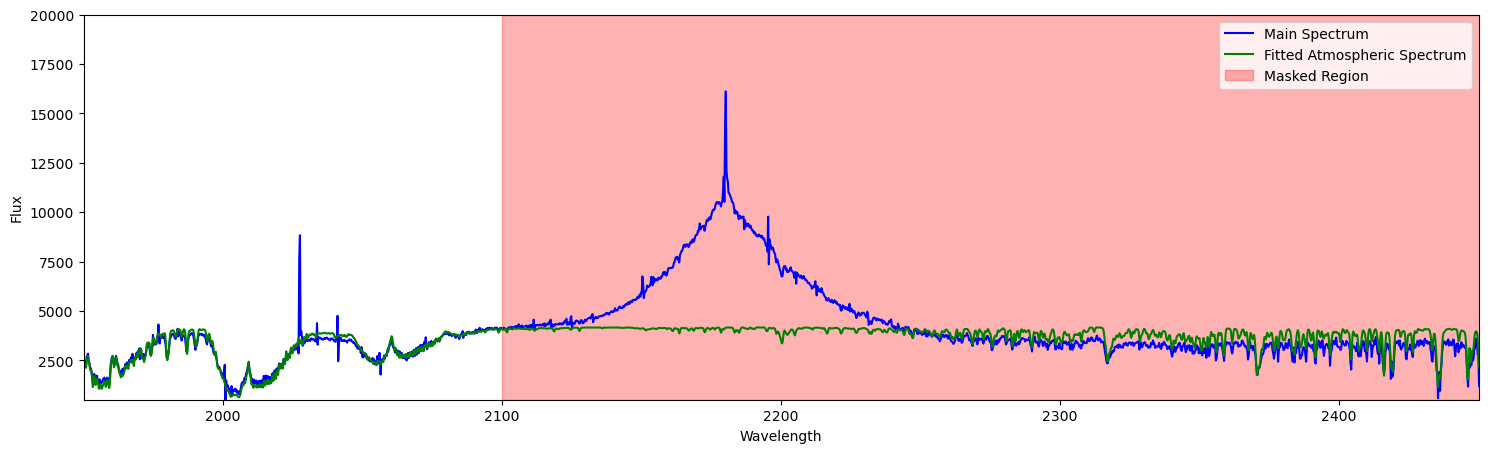

In [134]:
# get atm for best fit
atm_best = atmospheres[labels.index(best_fit[0])]
best_kernel_size = best_fit[1]
best_scaling_factor = best_fit[2]

plt.figure(figsize=(18, 5))
plt.plot(atm_best['wl'], spec1d, label='Main Spectrum', color='blue')
plt.plot(atm_best['wl'], atm_best['T_abs_scaled'], label='Fitted Atmospheric Spectrum', color='green')

# Highlight the masked region 
plt.axvspan(2100, 2500, color='red', alpha=0.3, label='Masked Region')
#plt.axvspan(1950, 2100, color='red', alpha=0.3, label='Masked Region')

plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(500, 20000)
plt.xlim(1950, 2450)
#plt.title(f'Fitted Atmospheric Spectrum\nKernel Width: {best_kernel_size}, Scaling Factor: {best_scaling_factor}')
plt.show()


# only fit to the region of interest don t worry about it being a worse fit in other areas


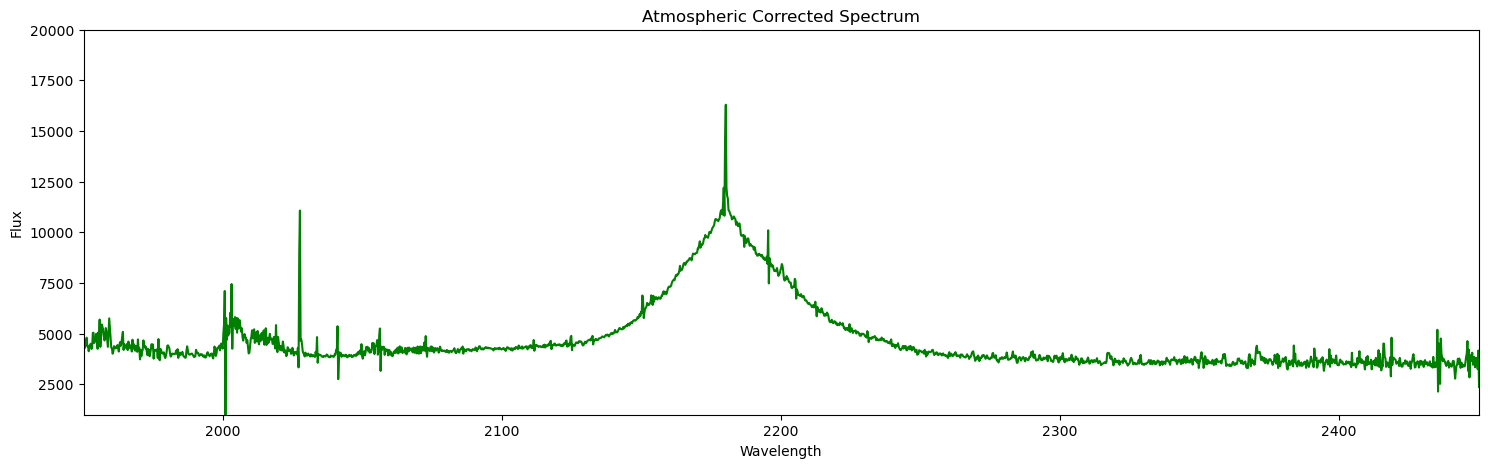

In [46]:
# Subtract the fitted atmospheric spectrum from the main spectrum
# Apply the scaling factor to the atmospheric transmission

# atmospheric correction without continuum correction 
atm_corr = (atm_best['T_abs_scaled']/4199)

spec1d_atm_sub = spec1d /  atm_corr

# Plot the atmospheric-subtracted spectrum
plt.figure(figsize=(18, 5))
plt.plot(atm_best['wl'], spec1d_atm_sub, color='green')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(1000, 20000)
plt.xlim(1950, 2450)
plt.title('Atmospheric Corrected Spectrum')
plt.show()

In [47]:
cube = SpectralCube.read(fname)

# Make blank cube the size of the original cube
blank_cube = np.ones(cube.shape)

# Apply the atmospheric correction to the blank cube
atm_corr_cube = (blank_cube.T * atm_corr).T


print(atm_corr_cube.shape)
print(cube.shape)

# Correct the main cube for atmospheric absorption
cube_atm_corr = cube / atm_corr_cube

# write cube to fits file
cube_atm_corr.write('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits', overwrite=True)


(2216, 146, 96)
(2216, 146, 96)


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


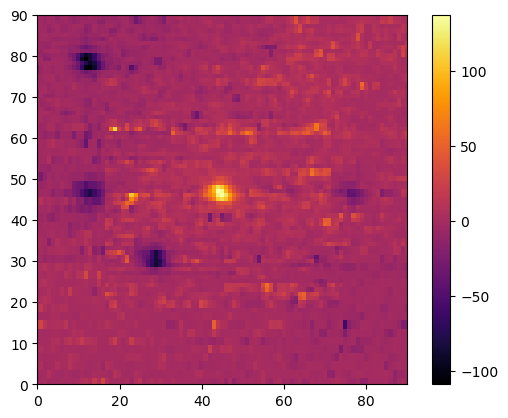

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


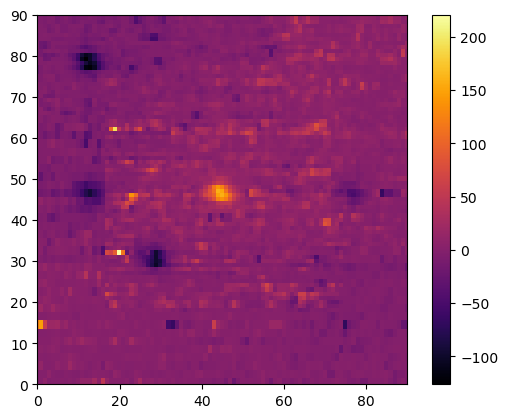

In [48]:
# cube1 2d image
image = cube.mean(axis=0)

# plot
plt.figure()
plt.imshow(image.data, origin='lower', cmap='inferno')
plt.colorbar()
plt.ylim(0, 90)
plt.xlim(0, 90)
plt.show()

# cube atm corr 2d image
image = cube_atm_corr.mean(axis=0)

# plot
plt.figure()
plt.imshow(image.data, origin='lower', cmap='inferno')
plt.colorbar()
plt.ylim(0, 90)
plt.xlim(0, 90)
plt.show()

In [24]:
X, Y = np.meshgrid(x, y)
x0, y0 = 44, 47

# 1D extraction aper:
r_ext = 3
aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
aper_cube = np.resize(aper, cube.shape)

spec1d = np.nansum(cube*aper_cube, axis=(1, 2)) 


KeyboardInterrupt: 

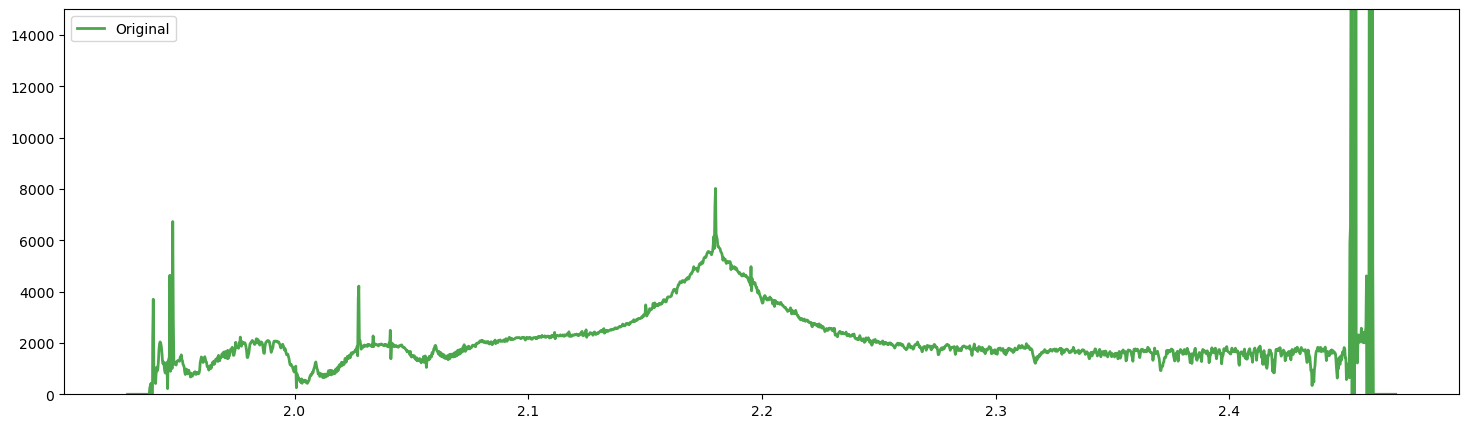

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(wl, spec1d, label='Original', lw=2, alpha=0.7, color='green')
plt.ylim(0, 15000)
plt.legend()

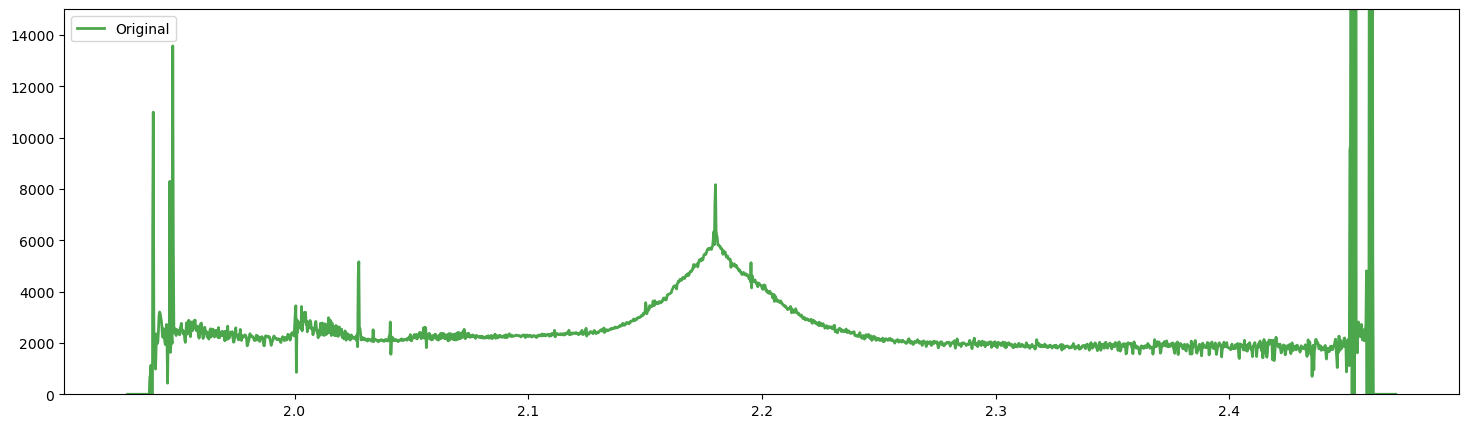

In [ ]:
X, Y = np.meshgrid(x, y)
x0, y0 = 44, 47

# 1D extraction aper:
r_ext = 3
aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
aper_cube = np.resize(aper, cube_atm_corr.shape)

spec1d = np.nansum(cube_atm_corr*aper_cube, axis=(1, 2)) 

plt.figure(figsize=(18, 5))
plt.plot(wl, spec1d, label='Original', lw=2, alpha=0.7, color='green')
plt.ylim(0, 15000)
plt.legend()

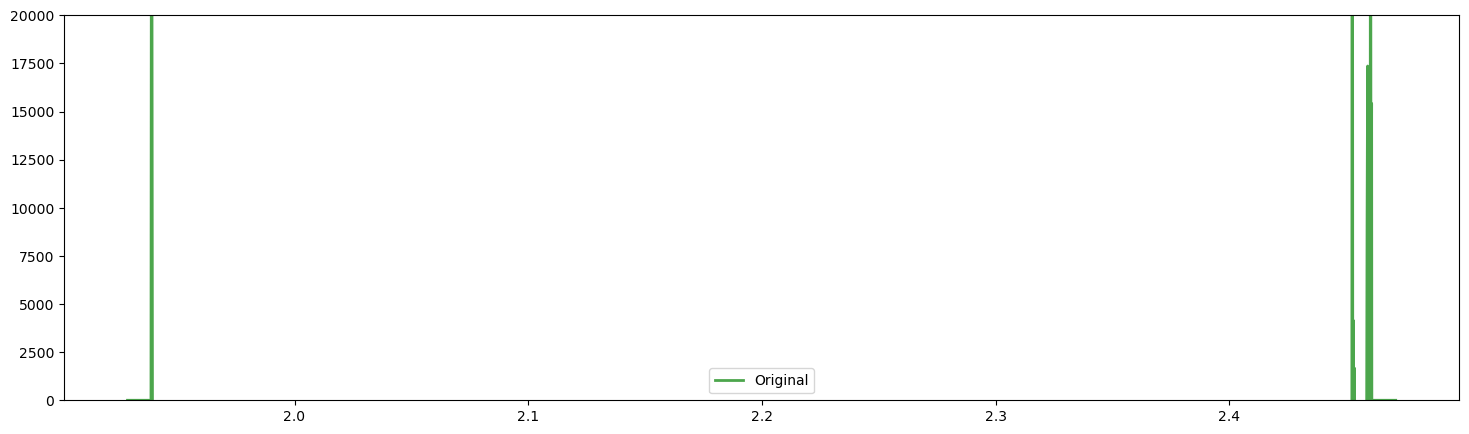

In [ ]:

plt.figure(figsize=(18, 5))
plt.plot(wl, -spec1d, label='Original', lw=2, alpha=0.7, color='green')
plt.ylim(0, 20000)
plt.legend()

In [ ]:
# read in this cube
cube_atm_corr = SpectralCube.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits')





Cube loaded


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


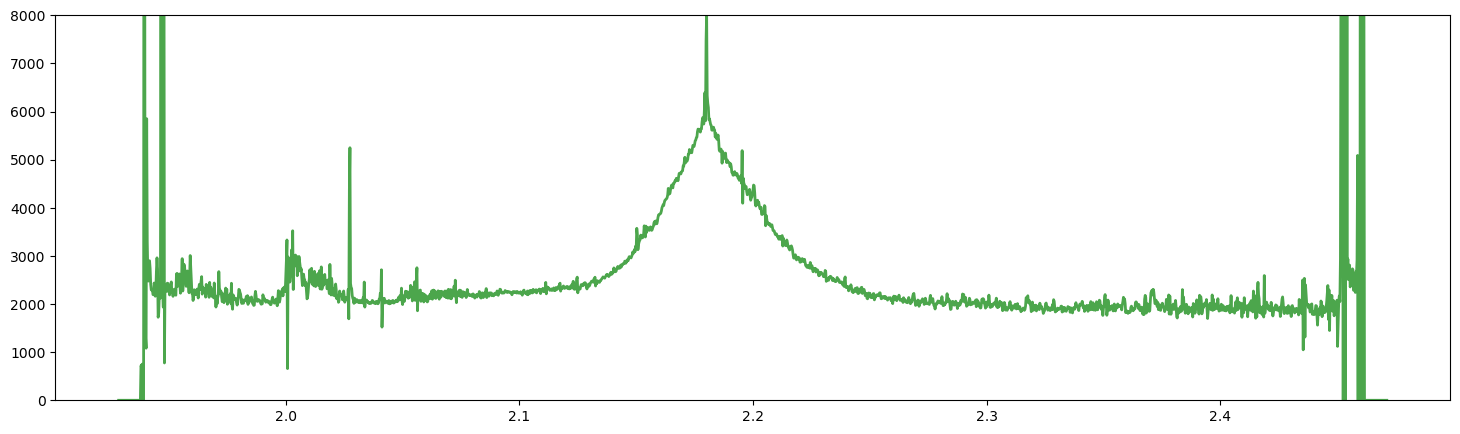

In [74]:
# check if filepath exists
if os.path.exists('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits'):
    # open the cube
    cube = fits.getdata('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits')
    hdr = fits.getheader('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits')
    print('Cube loaded')


wl = (np.arange(hdr['NAXIS3'])-hdr['CRPIX3'])*hdr['CDELT3'] + hdr['CRVAL3']
x = np.arange(hdr['NAXIS1'])
y = np.arange(hdr['NAXIS2'])
l = np.arange(hdr['NAXIS3'])


X, Y = np.meshgrid(x, y)


white_img = np.nanmedian(cube[200:-500, :, :], axis=0)


x0, y0 = 45, 47


# 1D extraction aper:
r_ext = 3
aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
aper_cube = np.resize(aper, cube.shape)

# plot the specttrum aper_cube 
spec1d = np.nansum(cube*aper_cube, axis=(1, 2))
plt.figure(figsize=(18, 5))
plt.plot(wl, spec1d, label='Original', lw=2, alpha=0.7, color='green')
plt.ylim(0, 8000)
plt.show()


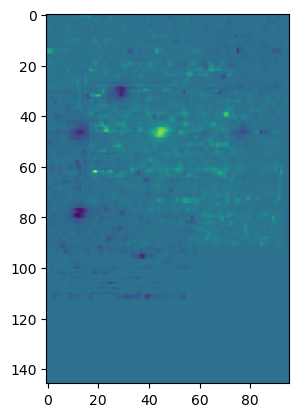

In [277]:
psf = np.nansum((cube_atm_corr), axis=0)
psf = psf / np.nansum(psf)

# plot the psf
plt.imshow(psf)

Cube loaded
Blue Cube Shape: (25, 146, 96)
Red Cube Shape: (24, 146, 96)


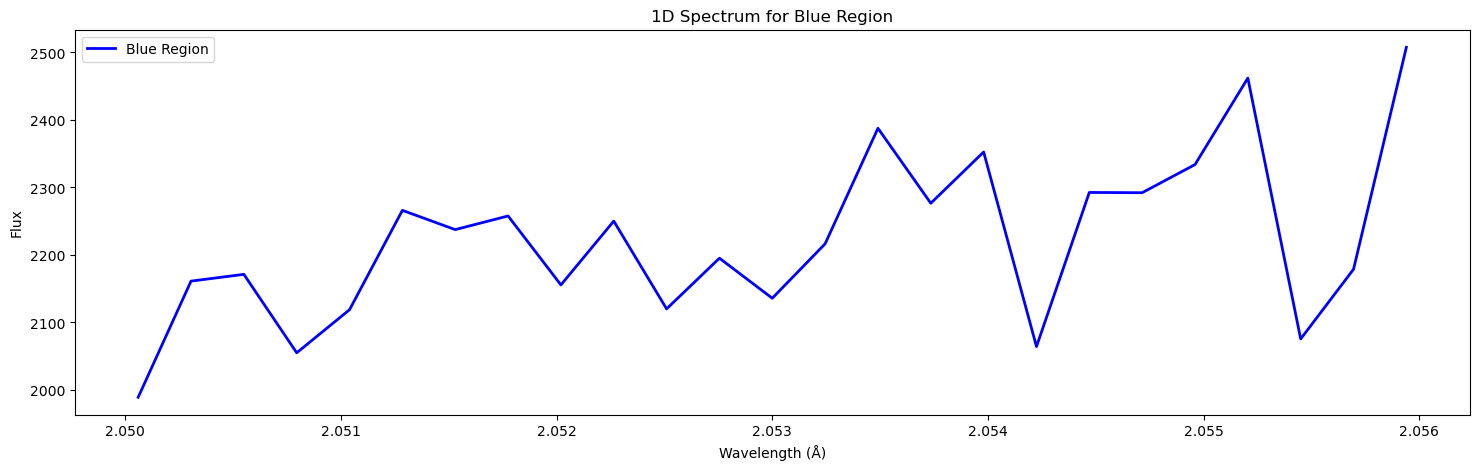

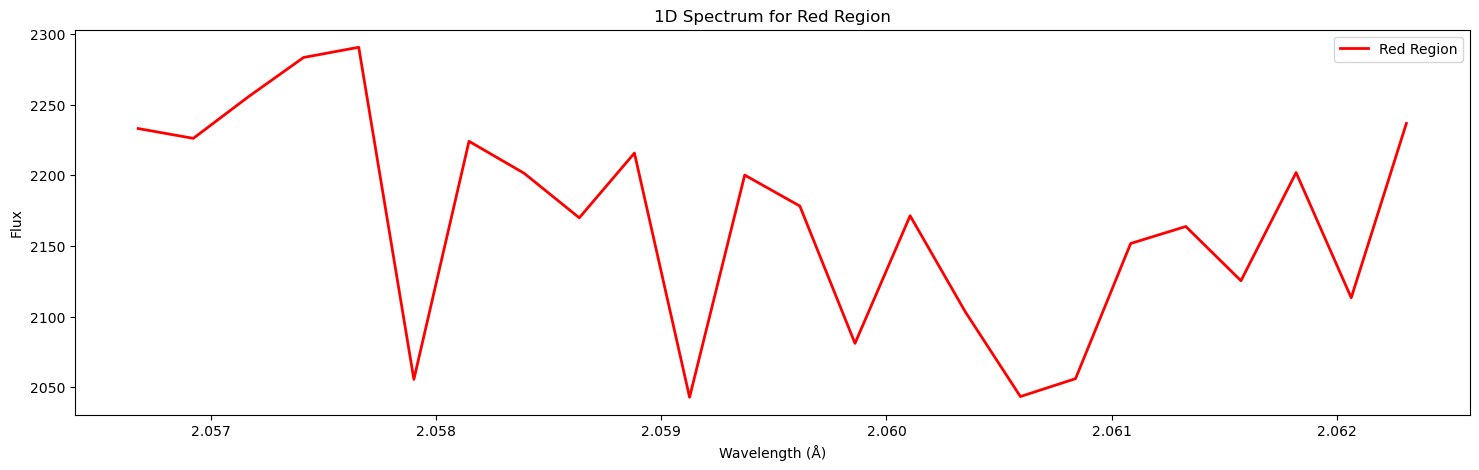

In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Check if the filepath exists
if os.path.exists('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits'):
    # Open the cube
    cube = fits.getdata('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits')
    hdr = fits.getheader('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_corrected_cube.fits')
    print('Cube loaded')

# Calculate the wavelength array
wl = (np.arange(hdr['NAXIS3']) - hdr['CRPIX3']) * hdr['CDELT3'] + hdr['CRVAL3']

# Define the blue and red wavelength ranges in Angstroms
imin_b, imax_b = 2.0500, 2.0560
imin_r, imax_r = 2.0565, 2.0625

# Identify indices corresponding to the blue and red ranges
blue_indices = np.where((wl >= imin_b) & (wl <= imax_b))[0]
red_indices = np.where((wl >= imin_r) & (wl <= imax_r))[0]

# Extract the sub-cubes
blue_cube = cube[blue_indices, :, :]  # Extract the blue cube
red_cube = cube[red_indices, :, :]    # Extract the red cube

# Optional: Print the shapes of the extracted cubes
print(f'Blue Cube Shape: {blue_cube.shape}')
print(f'Red Cube Shape: {red_cube.shape}')

# psf aper:
r_psf = 3
aper_psf = (X-x0)**2 + (Y-y0)**2 < r_psf**2
aper_psf_cube_b = np.resize(aper_psf, blue_cube.shape)
aper_psf_cube_r = np.resize(aper_psf, red_cube.shape)


# Optional: Plotting the 1D spectrum for the blue and red cubes
# 1D extraction for the blue cube
spec1d_blue = np.nansum(blue_cube*aper_psf_cube_b, axis=(1, 2))
plt.figure(figsize=(18, 5))
plt.plot(wl[blue_indices], spec1d_blue, label='Blue Region', lw=2, color='blue')
#plt.ylim(0, 8000)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('1D Spectrum for Blue Region')
plt.legend()
plt.show()

# 1D extraction for the red cube
spec1d_red = np.nansum(red_cube*aper_psf_cube_r, axis=(1, 2))
plt.figure(figsize=(18, 5))
plt.plot(wl[red_indices], spec1d_red, label='Red Region', lw=2, color='red')
#plt.ylim(0, 8000)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('1D Spectrum for Red Region')
plt.legend()
plt.show()

# Sum over the spectral axis (axis=0) to collapse the cube into 2D images for the PSF


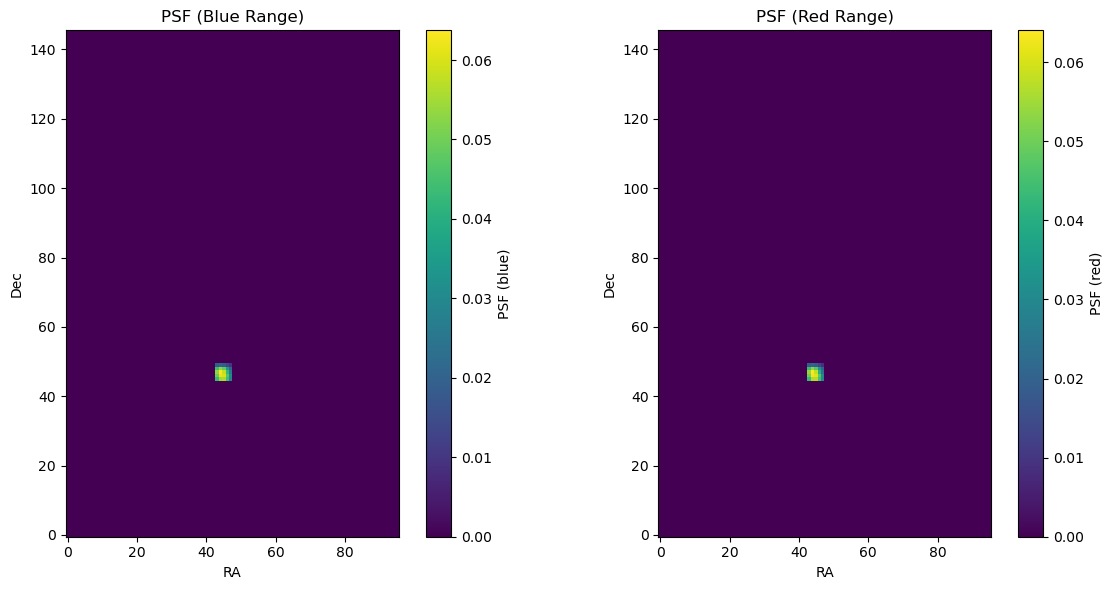

In [96]:
x0, y0 = 45, 47

# psf aper:
r_psf = 3
aper_psf = (X-x0)**2 + (Y-y0)**2 < r_psf**2
aper_psf_cube_b = np.resize(aper_psf, blue_cube.shape)
aper_psf_cube_r = np.resize(aper_psf, red_cube.shape)


psf_b = np.nansum(blue_cube*aper_psf_cube_b, axis=(0))
psf_r = np.nansum(red_cube*aper_psf_cube_r, axis=(0))


# Sum over the spectral axis (axis=0) to collapse the cube into 2D images for the PSF
#psf_b = np.nansum(blue_cube, axis=0)
#psf_r = np.nansum(red_cube, axis=0)

# Normalize the PSFs
psf_b = psf_b / np.nansum(psf_b)
psf_r = psf_r / np.nansum(psf_r)

# Now you can plot the PSF
plt.figure(figsize=(12, 6))

# Plot the PSF for the blue range
plt.subplot(1, 2, 1)
plt.imshow(psf_b, origin='lower', cmap='viridis')
plt.colorbar(label='PSF (blue)')
plt.title('PSF (Blue Range)')
plt.xlabel('RA')
plt.ylabel('Dec')

# Plot the PSF for the red range
plt.subplot(1, 2, 2)
plt.imshow(psf_r, origin='lower', cmap='viridis')
plt.colorbar(label='PSF (red)')
plt.title('PSF (Red Range)')
plt.xlabel('RA')
plt.ylabel('Dec')

plt.tight_layout()
plt.show()


In [77]:
print(wl)

[1.92854004 1.92878504 1.92903004 ... 2.47072505 2.47097005 2.47121505]


In [97]:
# find mean of each psf 

mean_psf_b = np.nanmean(psf_b)
mean_psf_r = np.nanmean(psf_r)

# find mean flux of each psf
mean_flux_b = np.nanmean(spec1d_blue)
mean_flux_r = np.nanmean(spec1d_red)

print

# find mean of the two fluxes
mean_flux = (mean_flux_b + mean_flux_r) / 2

print(mean_flux)

# average the psfs
mean_psf = (mean_psf_b + mean_psf_r ) / 2

cont = mean_psf


print(mean_psf)

2194.967540685224
7.134703196347032e-05


Text(0.5, 1.0, 'Continuum Subtracted 1D Spectrum')

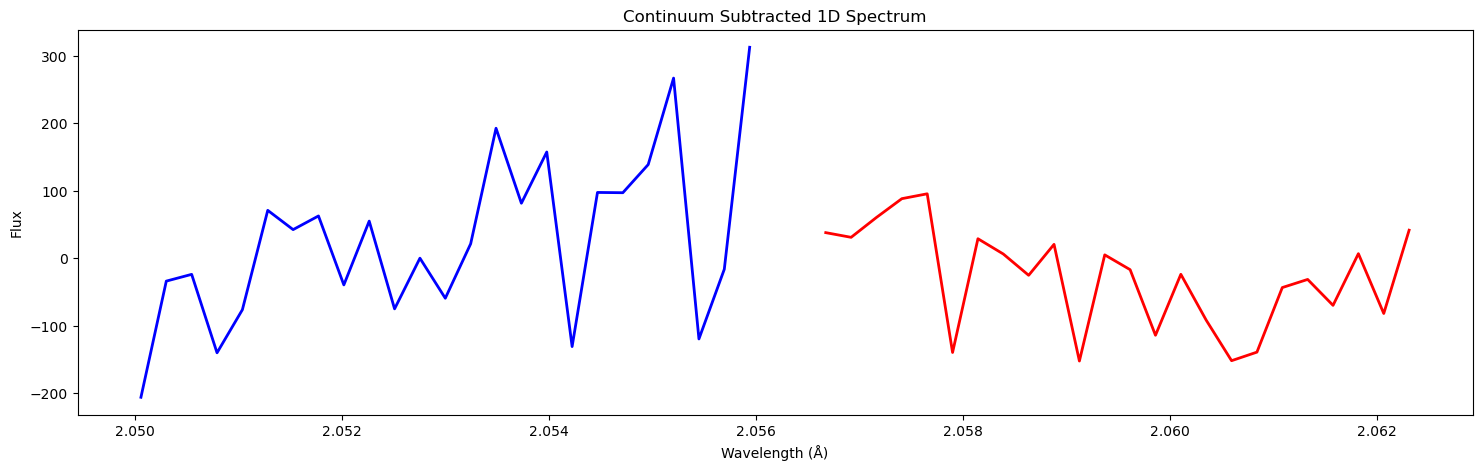

In [111]:
# subract the continuum from the spectrum
spec1d_blue = spec1d_blue - mean_flux

spec1d_red = spec1d_red - mean_flux

# plot the continuum subtracted spectrum
plt.figure(figsize=(18, 5))
plt.plot(wl[blue_indices], spec1d_blue, label='Blue Region', lw=2, color='blue')
plt.plot(wl[red_indices], spec1d_red, label='Red Region', lw=2, color='red')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('Continuum Subtracted 1D Spectrum')

In [ ]:
# make a cube with 

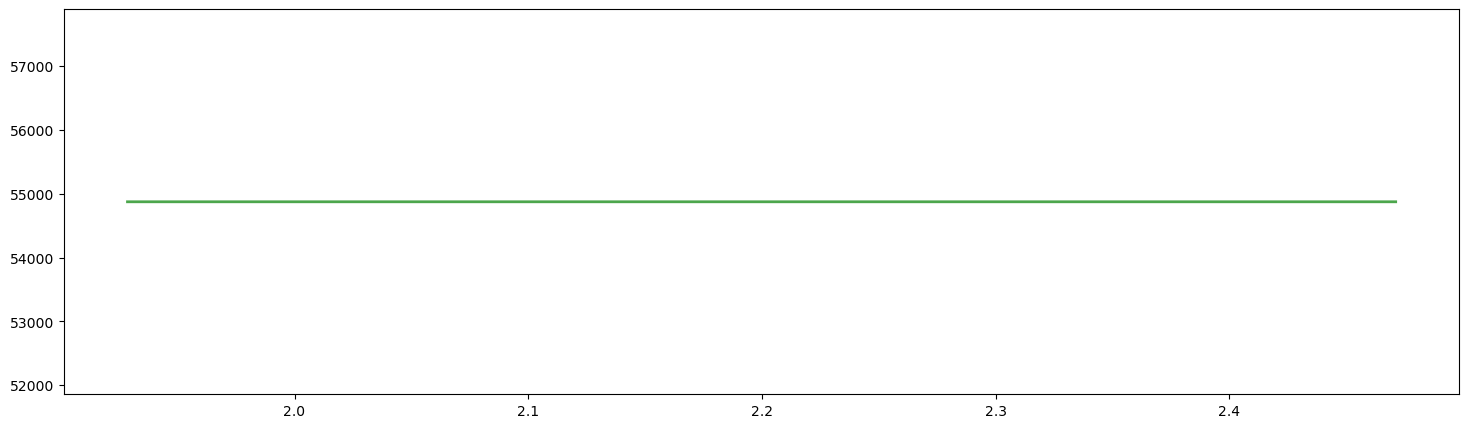

In [107]:
mask = (wl > 2.0550) & (wl < 2.0580)

# make a cube with mean_flux as the flux value at every pixel
mean_flux_cube = np.full(cube.shape, mean_flux)



# Continuum only
cont_cube = np.resize(mean_flux, cube.shape)
cont_cube = (cont_cube.T * cont).T
# apply only in wavlength range

mask_reshaped = np.resize(mask, cont_cube.shape)
cont_cube = cont_cube * mask_reshaped
psf_sub_cube = cube - cont_cube

# get 1d spec for the cube atm corr

spec1d_cont = np.nansum(mean_flux_cube*aper_cube, axis=(1, 2))



In [109]:
print (mean_flux_cube[3,4,3])

2194.967540685224


In [99]:
#print the of the psf sub sube at lambda 2.0558
print(spec1d_cont[mask])

print(spec1d[mask])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2462.01526452 2075.62168016 2178.86132394 2507.66683506 2753.63135396
 1860.04479694 2233.09376452 2226.15643624 2255.63085445 2283.40334715
 2290.61936145 2055.58570002]


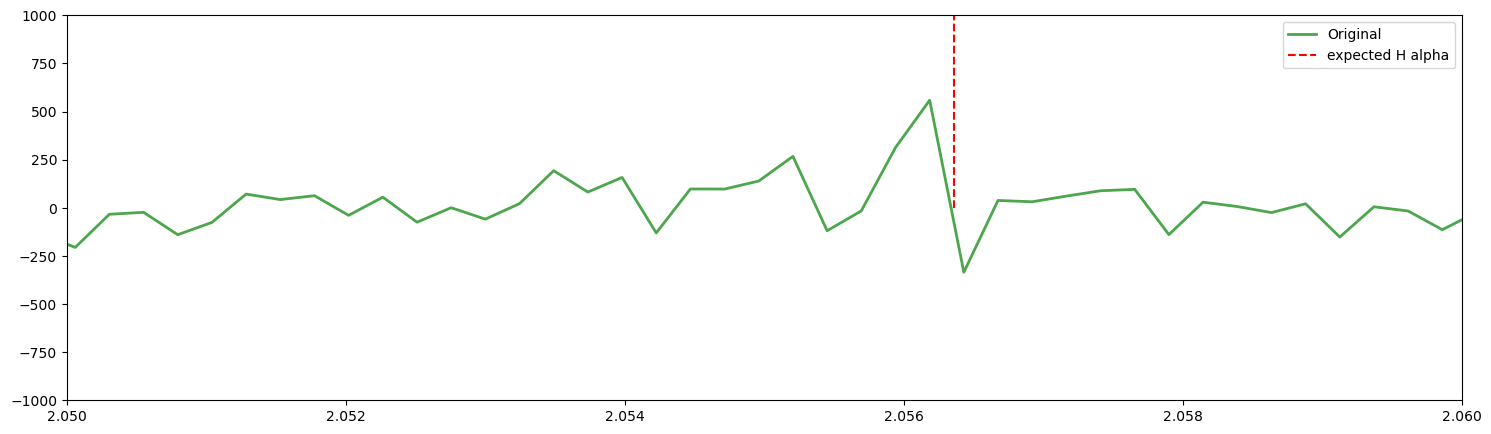

In [114]:

plt.figure(figsize=(18, 5))
plt.plot(wl, spec1d-mean_flux, label='Original', lw=2, alpha=0.7, color='green')
plt.vlines(2.056358, 0, 20000, color='red', linestyle='--', label='expected H alpha')
plt.ylim(-1000, 1000)
plt.xlim(2.05, 2.06)
plt.legend()

Amplitude: 8844.50
Centre: 2180.30
Width: 4760.25


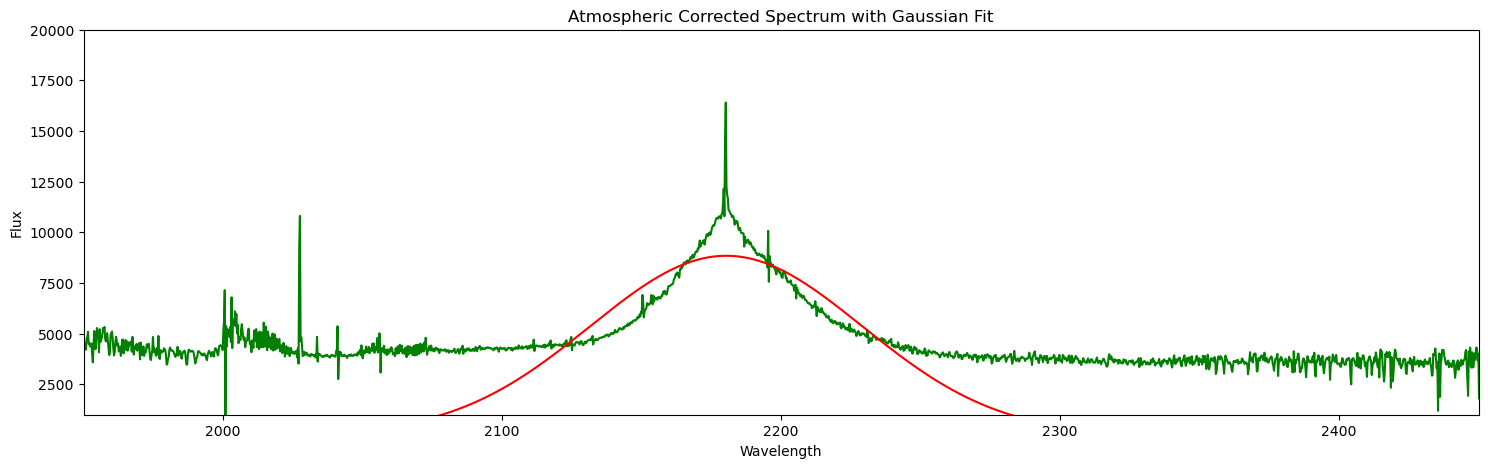

In [278]:
from scipy.optimize import curve_fit
newmask = (atm_best['wl'] > 2100) & (atm_best['wl'] < 2250)
# fit gaussian to the masked region

def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

# Initial guess for the Gaussian parameters
initial_guess = [15000, 2175, 5]

# Fit the Gaussian to the masked region
popt, _ = curve_fit(gaussian, atm_best['wl'][newmask], spec1d_atm_sub[newmask], p0=initial_guess)

# Extract the fitted Gaussian parameters
amp, cen, wid = popt

# Plot the Gaussian fit
plt.figure(figsize=(18, 5))
plt.plot(atm_best['wl'], spec1d_atm_sub, color='green')
plt.plot(atm_best['wl'], gaussian(atm_best['wl'], *popt), color='red', label='Gaussian Fit')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(1000, 20000)
plt.xlim(1950, 2450)
plt.title('Atmospheric Corrected Spectrum with Gaussian Fit')

# Print the fitted Gaussian parameters
print(f"Amplitude: {amp:.2f}")
print(f"Centre: {cen:.2f}")
print(f"Width: {wid:.2f}")

plt.show()

In [279]:
# Function to calculate redshift
def calculate_redshift(observed_wavelength, rest_wavelength):
    redshift = (observed_wavelength / rest_wavelength) - 1
    return redshift


rest_wavelength_ha = 6564.61


observed_wavelength_ha = 21803.0

# Calculate redshift
redshift_ha = calculate_redshift(observed_wavelength_ha, rest_wavelength_ha)
print(f"The redshift (z) is: {redshift_ha:.4f}")


The redshift (z) is: 2.3213


In [280]:
# find h alpha observed line for a given redshift

def observed_wavelength(rest_wavelength, redshift):
    observed_wavelength = (1 + redshift) * rest_wavelength
    return observed_wavelength

# Rest wavelength of H-alpha
rest_wavelength_ha = 6564.61

# Redshift of the source
z_abs = 2.13249

# Calculate the observed wavelength of H-alpha
observed_wavelength_ha = observed_wavelength(rest_wavelength_ha, z_abs)

print(f"The observed wavelength of H-alpha is: {observed_wavelength_ha:.2f} Å")

The observed wavelength of H-alpha is: 20563.58 Å


In [ ]:
psf 

have to be careful how much my initial guesses affect the result 
after i have now changed the guess need to divide out by then correct scaling factor 
then need to see if flat enough after correction 